In [94]:
import pandas as pd

# Load the company data into a pandas DataFrame
df = pd.read_csv(r"C:\Users\mk744\OneDrive - Poornima University\Documents\Analyze the data\Project_File_Handling\My_Data.csv")  # Replace "company_data.csv" with the path to your dataset

# Display the first few rows of the DataFrame to verify the columns

# Check if the DataFrame contains the required columns
required_columns = ['Campaign_Name', 'Time', 'Payout', 'Clicks', 'Partner']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print("Missing columns:", missing_columns)
else:
    print("All required columns are present in the DataFrame.")

All required columns are present in the DataFrame.


In [95]:
df.head(5)

,Campaign_Name,Clicks,CR,Leads,Sales_Amount,Payout,Time,Partner
0,0me.com,68,5.88%,4,27.97,2.40,A-January'2023,Impact_FS
1,0me.com,9,0.00%,0,0.00,0.00,H-August'2023,Impact_FS
2,0me.com,46,4.35%,2,47.96,0.00,I-September'2023,Impact_FS
3,0me.com,31,0.00%,0,0.00,0.00,J-October'2023,Impact_FS
4,0me.com,24,0.00%,0,0.00,0.00,K-November'2023,Impact_FS


In [96]:
# Select relevant columns
relevant_columns = ['Campaign_Name', 'Time', 'Payout', 'Clicks', 'Partner']
df_selected = df[relevant_columns]

# Display the first few rows of the selected DataFrame
print(df_selected.head())


  Campaign_Name              Time  Payout  Clicks    Partner
0       0me.com    A-January'2023    2.40      68  Impact_FS
1       0me.com     H-August'2023    0.00       9  Impact_FS
2       0me.com  I-September'2023    0.00      46  Impact_FS
3       0me.com    J-October'2023    0.00      31  Impact_FS
4       0me.com   K-November'2023    0.00      24  Impact_FS


In [97]:
# Filter campaigns with clicks > 0 and payout < some_threshold (considering it as poor)
some_threshold = 100  # Define your threshold for poor payout
good_clicks_poor_payout_greater_500 = df_selected[(df_selected['Clicks'] >= 500) & (df_selected['Payout'] < some_threshold)]
print("\nCampaigns with good clicks but poor payout:")
print(good_clicks_poor_payout_greater_500[['Campaign_Name', 'Clicks', 'Payout','Time','Partner']])


Campaigns with good clicks but poor payout:
             Campaign_Name  Clicks  Payout             Time       Partner
17                0mecheap     524   12.20      G-July'2023     Impact_FS
26                0mecheap    2209   71.15     C-March'2023  Impact_Hyzzo
29                0mecheap     524   12.20      G-July'2023  Impact_Hyzzo
40                0mecheap    1595   64.88   A-January'2023     Impact_ZO
41                0mecheap    1230   35.85  B-February'2023     Impact_ZO
...                    ...     ...     ...              ...           ...
4327        Yoox Many GEOs     614    0.00  B-February'2023    Admitad_FS
4329        Yoox Many GEOs     724    0.00     D-April'2023    Admitad_FS
4425  Zulily.com CPS - USA    2284    0.00     D-April'2023      Vcom_old
4426  Zulily.com CPS - USA    1085    0.00       E-May'2023      Vcom_old
4427  Zulily.com CPS - USA     987    0.00      F-June'2023      Vcom_old

[513 rows x 5 columns]


In [98]:
good_clicks_poor_payout_greater_500.to_csv('good_clicks_poor_payout_greater_500.csv', index=False)

In [99]:
df['Time'] = df['Time'].apply(lambda x: pd.to_datetime(x.split('-', 1)[1], format="%B'%Y"))


In [100]:
df['Time']

0      2023-01-01
1      2023-08-01
2      2023-09-01
3      2023-10-01
4      2023-11-01
          ...    
4423   2023-09-01
4424   2023-10-01
4425   2023-04-01
4426   2023-05-01
4427   2023-06-01
Name: Time, Length: 4428, dtype: datetime64[ns]

In [101]:
# Count duplicate values in each column
duplicate_counts = df.apply(lambda x: x.duplicated().sum())

# Print the counts of duplicate values in each column
print("Duplicate Value Counts:")
print(duplicate_counts)


Duplicate Value Counts:
Campaign_Name    3894
Clicks           3213
CR               3803
Leads            4035
Sales_Amount     4004
Payout           3274
Time             4414
Partner          4408
dtype: int64


In [102]:
# Display the number of unique values in each column
unique_counts = df.nunique()

# Print the number of unique values in each column
print("Number of Unique Values in Each Column:")
print(unique_counts)


Number of Unique Values in Each Column:
Campaign_Name     534
Clicks           1215
CR                625
Leads             393
Sales_Amount      424
Payout           1154
Time               14
Partner            20
dtype: int64


In [103]:
import warnings
warnings.filterwarnings("ignore")
df.groupby('Campaign_Name').sum()['Payout'].sort_values(ascending = False).head(20)

Campaign_Name
Adobe Many GEOs                  3,236,569.14
Udemy WW                           636,026.22
Aliexpress.com CPS - Worldwide     521,589.40
Myntra                             477,911.60
ExpressVPN                         370,214.92
Flipkart                           344,749.83
Lenovo Many GEOs                   326,809.51
Flipkart [CPS] IN                  294,814.35
Alibaba WW                         277,735.80
Macy's Many GEOs                   264,802.88
ZipRecruiter US                    199,371.37
Microsoft [CPS] IN US APAC         177,015.53
Walmart Affiliate Program          162,038.42
Kamaayurveda [CPS] Many Geo's      158,846.64
Shutterstock WW                    158,281.59
Norton [CPS] WW                    151,365.23
Trainline WW                       137,825.80
Wondershare WW                     102,761.80
GoDaddy [CPS] APAC                  93,998.06
Expedia [CPS] Many Geos             82,335.30
Name: Payout, dtype: float64

In [104]:
# Sum the duplicate values in each column
sum_duplicates = df.groupby(df.columns.tolist()).size().reset_index(name='Count').head(5)

# Print the sum of duplicate values in each column
print("Sum of Duplicate Values in Each Column:")
sum_duplicates

Sum of Duplicate Values in Each Column:


,Campaign_Name,Clicks,CR,Leads,Sales_Amount,Payout,Time,Partner,Count
0,0PLoungewear.com CPS - Worldwide,1,0.00%,0,0.00,0.00,2023-12-01,Vcom_new,1
1,0PLoungewear.com CPS - Worldwide,2,0.00%,0,0.00,0.00,2023-09-01,Vcom_new,1
2,0PLoungewear.com CPS - Worldwide,3,0.00%,0,0.00,0.00,2023-04-01,Vcom_old,1
3,0PLoungewear.com CPS - Worldwide,4,0.00%,0,0.00,0.00,2023-07-01,Vcom_new,1
4,0me.com,9,0.00%,0,0.00,0.00,2023-08-01,Impact_FS,1


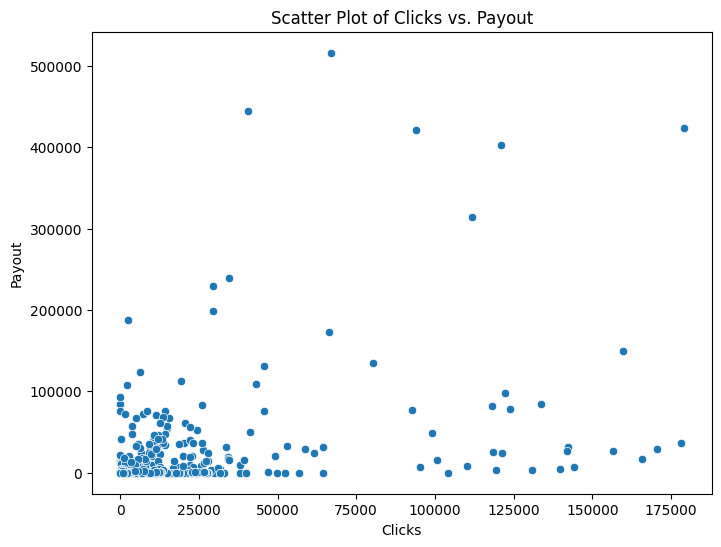

Correlation between Clicks and Payout: 0.47628266444930084


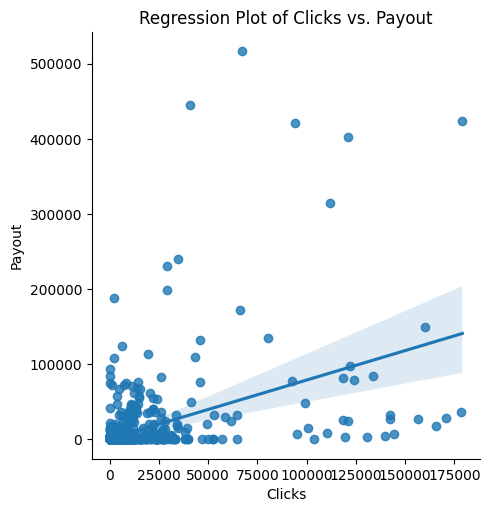

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Assuming df is your DataFrame with 'Clicks' and 'Payout' columns

# Step 1: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Clicks', y='Payout', data=df)
plt.title('Scatter Plot of Clicks vs. Payout')
plt.xlabel('Clicks')
plt.ylabel('Payout')
plt.show()

# Step 2: Correlation
correlation = df['Clicks'].corr(df['Payout'])
print("Correlation between Clicks and Payout:", correlation)

# Step 3: Regression Analysis
sns.lmplot(x='Clicks', y='Payout', data=df)
plt.title('Regression Plot of Clicks vs. Payout')
plt.xlabel('Clicks')
plt.ylabel('Payout')
plt.show()

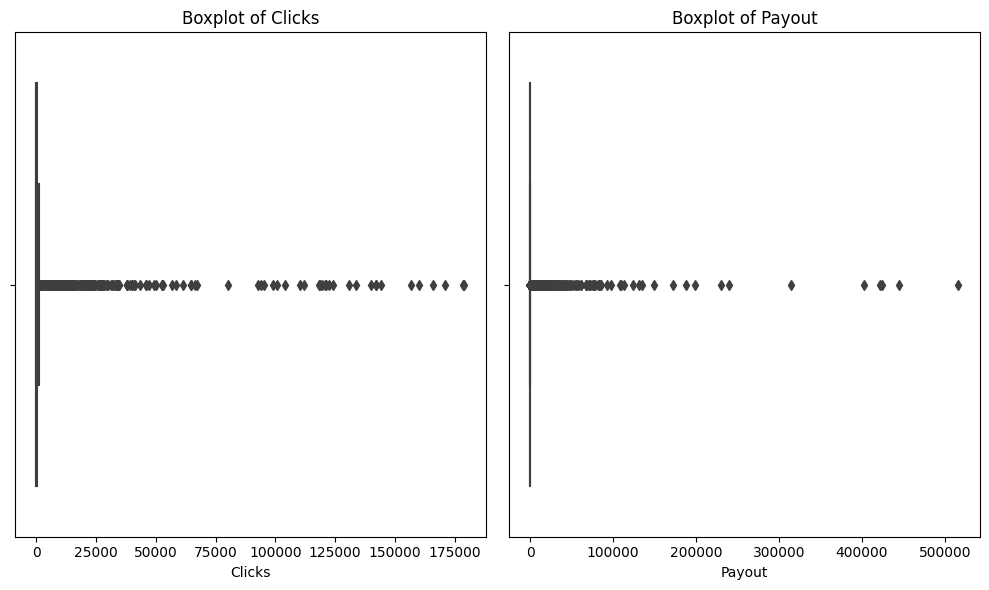

In [106]:
from scipy.stats import zscore

# Calculate z-scores for Clicks and Payout columns
df['Clicks_Zscore'] = zscore(df['Clicks'])
df['Payout_Zscore'] = zscore(df['Payout'])

# Identify outliers based on z-score
clicks_outliers = df[df['Clicks_Zscore'].abs() > 3]
payout_outliers = df[df['Payout_Zscore'].abs() > 3]
# Remove the temporary columns
df.drop(columns=['Clicks_Zscore', 'Payout_Zscore'], inplace=True)
# Create boxplots for Clicks and Payout columns
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Clicks'])
plt.title('Boxplot of Clicks')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Payout'])
plt.title('Boxplot of Payout')

plt.tight_layout()
plt.show()


In [107]:
print("Outliers based on Z-score for Clicks:")
clicks_outliers.head()


Outliers based on Z-score for Clicks:


,Campaign_Name,Clicks,CR,Leads,Sales_Amount,Payout,Time,Partner,Clicks_Zscore,Payout_Zscore
132,Adobe Many GEOs,67086,0.51%,342,0.00,"516,202.98",2023-01-01,Admitad_FS,5.62,27.08
133,Adobe Many GEOs,40765,0.58%,236,0.00,"444,835.03",2023-02-01,Admitad_FS,3.34,23.32
141,Adobe Many GEOs,45810,0.31%,78,"202,125.83","131,627.10",2023-02-01,Partnerize_Hyzzo,3.78,6.82
142,Adobe Many GEOs,103994,0.42%,274,"723,059.78",0.00,2023-03-01,Partnerize_Hyzzo,8.82,-0.12
143,Adobe Many GEOs,93997,0.44%,210,"491,017.72","421,083.14",2023-04-01,Partnerize_Hyzzo,7.96,22.07


In [108]:
print("\nOutliers based on Z-score for Payout:")
payout_outliers.head()


Outliers based on Z-score for Payout:


,Campaign_Name,Clicks,CR,Leads,Sales_Amount,Payout,Time,Partner,Clicks_Zscore,Payout_Zscore
132,Adobe Many GEOs,67086,0.51%,342,0.00,"516,202.98",2023-01-01,Admitad_FS,5.62,27.08
133,Adobe Many GEOs,40765,0.58%,236,0.00,"444,835.03",2023-02-01,Admitad_FS,3.34,23.32
141,Adobe Many GEOs,45810,0.31%,78,"202,125.83","131,627.10",2023-02-01,Partnerize_Hyzzo,3.78,6.82
143,Adobe Many GEOs,93997,0.44%,210,"491,017.72","421,083.14",2023-04-01,Partnerize_Hyzzo,7.96,22.07
144,Adobe Many GEOs,111841,0.31%,156,"351,039.41","314,137.35",2023-05-01,Partnerize_Hyzzo,9.51,16.43


In [109]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame with 'Clicks' and 'Payout' columns

# Step 1: Scatter Plot
scatter_plot = px.scatter(df, x='Clicks', y='Payout', title='Scatter Plot of Clicks vs. Payout',
                          labels={'Clicks': 'Clicks', 'Payout': 'Payout'})
scatter_plot.show()

# Step 2: Correlation (Plotly doesn't provide direct correlation values)
correlation = df['Clicks'].corr(df['Payout'])
print("Correlation between Clicks and Payout:", correlation)

# Step 3: Regression Analysis
regression_plot = px.scatter(df, x='Clicks', y='Payout', trendline='ols',
                             title='Regression Plot of Clicks vs. Payout',
                             labels={'Clicks': 'Clicks', 'Payout': 'Payout'})
regression_plot.show()


Correlation between Clicks and Payout: 0.47628266444930084


In [110]:
# Group by the specified columns and sum the values
sum_duplicates = df.groupby(['Campaign_Name', 'Clicks', 'Payout', 'Time']).size().reset_index(name='count')

# Print the sum of duplicate values for the specified columns
print("Sum of Duplicate Values for Campaign_Name, Clicks, Payout, and Time:")
sum_duplicates

Sum of Duplicate Values for Campaign_Name, Clicks, Payout, and Time:


,Campaign_Name,Clicks,Payout,Time,count
0,0PLoungewear.com CPS - Worldwide,1,0.00,2023-12-01,1
1,0PLoungewear.com CPS - Worldwide,2,0.00,2023-09-01,1
2,0PLoungewear.com CPS - Worldwide,3,0.00,2023-04-01,1
3,0PLoungewear.com CPS - Worldwide,4,0.00,2023-07-01,1
4,0me.com,9,0.00,2023-08-01,2
...,...,...,...,...,...
3768,utsource.net,1,0.00,2023-09-01,1
3769,utsource.net,1,0.00,2023-10-01,1
3770,utsource.net,2,0.00,2023-01-01,1
3771,utsource.net,3,0.00,2023-02-01,1


In [111]:
# Extract month from the 'Time' column
df['Month'] = df['Time'].dt.month

# Group data by month and partner
monthly_data = df.groupby(['Month', 'Partner']).agg({'Clicks': 'sum', 'Payout': 'sum'})


In [112]:
monthly_data.head(50)

Clicks       Payout
Month Partner                              
1     Admitad_FS        933237 1,137,622.70
      Admitad_XO        139310   269,603.20
      Cuelinks            1481       760.20
      Imact_Hyzzo        11596        11.95
      Impact_A_Goyal      7815   193,467.81
      Impact_FS          34379     2,581.73
      Impact_Hyzzo       26564     2,556.26
      Impact_XO          11596        11.95
      Impact_ZO          92088     2,483.72
      Optimize Media     27969     4,527.49
      Partnerize_FS         60         0.70
      Partnerize_Hyzzo   33640   210,467.56
      Pokket_FS         117531       725.28
      Pokket_XO         262562       728.12
      Vcom_new           42245         0.00
2     Admitad_FS        705170 1,058,352.84
      Cuelinks             861         0.00
      Imapct_ZO         144623     3,345.39
      Impact_A_Goyal     10949   126,251.06
      Impact_FS          38130    60,778.01
      Impact_Hyzzo       42096     5,333.51
      Impact_XO          24146       727.66
      Impact_ZO          28324     2,047.42
      Partnerize_FS        141         1.14
      Partnerize_Hyzzo   78717   370,908.33
      Pokket_FS          90246       832.22
      Pokket_XO         300132     1,170.07
3     Admitad_FS        705164   531,117.54
      Impact_A_Goyal      2636    90,108.90
      Impact_FS          27330    90,931.07
      Impact_Hyzzo      209231    11,168.21
      Impact_XO          27330     1,104.71
      Impact_ZO          32373     3,599.73
      Partnerize_FS        274         1.38
      Partnerize_Hyzzo  104872         0.00
      Pokket_FS          64036       883.47
      Pokket_XO         168682     1,457.92
4     Admitad_FS        688656   510,820.85
      Admitad_XO         80613   134,579.55
      Impact_A_Goyal       927     2,066.70
      Impact_FS          26268       804.49
      Impact_Hyzzo       26955       907.57
      Impact_XO          26268       804.49
      Impact_ZO          30705     3,513.77
      Partnerize_FS        289         1.98
      Partnerize_Hyzzo   95517   421,083.14
      Pokket_FS          64036       883.47
      Pokket_XO         110064     1,564.62
      Vcom_old           97421   196,867.30
5     Admitad_FS        580199   451,275.89

In [113]:
monthly_data.to_csv('Months_Clicks_Payout.csv')

In [114]:
# Set display format for float numbers
pd.options.display.float_format = '{:,.2f}'.format

# Now, when you print the DataFrame with the payout values, they will be displayed in numbers format
print(monthly_data)


                        Clicks       Payout
Month Partner                              
1     Admitad_FS        933237 1,137,622.70
      Admitad_XO        139310   269,603.20
      Cuelinks            1481       760.20
      Imact_Hyzzo        11596        11.95
      Impact_A_Goyal      7815   193,467.81
...                        ...          ...
12    Partnerize_FS          1         0.82
      Partnerize_Hyzzo   11863    74,045.31
      Pokket_FS           3112       289.00
      Pokket_XO         105946       355.08
      Vcom_new           21627     8,284.37

[153 rows x 2 columns]


In [115]:
# Calculate the difference in clicks and payout compared to the previous month
monthly_data['Clicks_Diff'] = monthly_data['Clicks'].diff()
monthly_data['Payout_Diff'] = monthly_data['Payout'].diff()

# Print the DataFrame with differences
print(monthly_data)

                        Clicks       Payout  Clicks_Diff  Payout_Diff
Month Partner                                                        
1     Admitad_FS        933237 1,137,622.70          NaN          NaN
      Admitad_XO        139310   269,603.20  -793,927.00  -868,019.50
      Cuelinks            1481       760.20  -137,829.00  -268,843.00
      Imact_Hyzzo        11596        11.95    10,115.00      -748.25
      Impact_A_Goyal      7815   193,467.81    -3,781.00   193,455.86
...                        ...          ...          ...          ...
12    Partnerize_FS          1         0.82   -17,314.00    -3,602.96
      Partnerize_Hyzzo   11863    74,045.31    11,862.00    74,044.49
      Pokket_FS           3112       289.00    -8,751.00   -73,756.31
      Pokket_XO         105946       355.08   102,834.00        66.08
      Vcom_new           21627     8,284.37   -84,319.00     7,929.29

[153 rows x 4 columns]


In [116]:
# Identify months with high clicks but low payout
high_clicks_low_payout = monthly_data[(monthly_data['Clicks_Diff'] > 0) & (monthly_data['Payout_Diff'] < 0)]
print("Months with high clicks but low payout:")
print(high_clicks_low_payout)

Months with high clicks but low payout:
                        Clicks     Payout  Clicks_Diff  Payout_Diff
Month Partner                                                      
1     Imact_Hyzzo        11596      11.95    10,115.00      -748.25
      Impact_FS          34379   2,581.73    26,564.00  -190,886.08
      Pokket_FS         117531     725.28    83,891.00  -209,742.28
2     Impact_FS          38130  60,778.01    27,181.00   -65,473.05
      Impact_Hyzzo       42096   5,333.51     3,966.00   -55,444.50
      Pokket_FS          90246     832.22    11,529.00  -370,076.12
3     Impact_Hyzzo      209231  11,168.21   181,901.00   -79,762.86
      Partnerize_Hyzzo  104872       0.00   104,598.00        -1.38
4     Impact_FS          26268     804.49    25,341.00    -1,262.21
6     Admitad_XO        169201 108,069.22   125,554.00   -40,260.31
      Impact_FS          30269   1,692.13    29,225.00    -2,280.67
8     Impact_FS          10483     574.65     8,900.00    -5,153.02
9     Im

In [117]:
high_clicks_low_payout.to_csv('high_clicks_low_payout.csv')

In [118]:
# Identify months with declining clicks
declining_clicks = monthly_data[monthly_data['Clicks_Diff'] < 0]
print("Months with declining clicks:")
print(declining_clicks)

Months with declining clicks:
                      Clicks     Payout  Clicks_Diff  Payout_Diff
Month Partner                                                    
1     Admitad_XO      139310 269,603.20  -793,927.00  -868,019.50
      Cuelinks          1481     760.20  -137,829.00  -268,843.00
      Impact_A_Goyal    7815 193,467.81    -3,781.00   193,455.86
      Impact_Hyzzo     26564   2,556.26    -7,815.00       -25.47
      Impact_XO        11596      11.95   -14,968.00    -2,544.31
...                      ...        ...          ...          ...
12    Cuelinks           899     840.46   -26,223.00   -48,311.93
      Optimize Media   17315   3,603.78  -105,168.00       -58.93
      Partnerize_FS        1       0.82   -17,314.00    -3,602.96
      Pokket_FS         3112     289.00    -8,751.00   -73,756.31
      Vcom_new         21627   8,284.37   -84,319.00     7,929.29

[72 rows x 4 columns]


In [119]:
declining_clicks.to_csv('Months with declining clicks.csv', index=False)

In [120]:
# Select relevant columns
df = df[['Campaign_Name', 'Clicks', 'Payout']]

# Sort the DataFrame by clicks and payout columns in descending order
sorted_df = df.sort_values(by=['Clicks', 'Payout'], ascending=False)

# Identify the top 50 campaigns with the highest clicks and payout
top_50_high_clicks_payout = sorted_df.head(50)

# Identify the bottom 50 campaigns with the lowest clicks and payout
bottom_50_low_clicks_payout = sorted_df.tail(50)

# Display the top and bottom campaigns
print("Top 50 Campaigns with Highest Clicks and Payout:")
top_50_high_clicks_payout.head()




Top 50 Campaigns with Highest Clicks and Payout:


,Campaign_Name,Clicks,Payout
2646,Myntra,179022,"423,602.60"
2513,Microsoft [CPS] IN US APAC,178288,"36,147.74"
2515,Microsoft [CPS] IN US APAC,170690,"28,934.82"
2727,Nike [CPS] APAC,165846,"17,214.44"
1483,Flipkart,159841,"149,551.13"


In [121]:
# Filter the DataFrame to include rows where clicks are high and payout is greater than or equal to 1000
filtered_df = sorted_df[(sorted_df['Clicks'] > 0) & (sorted_df['Payout'] >= 1000)]

# Identify the top 50 campaigns with the highest clicks and payout after filtering
top_50_filtered = filtered_df.head(50)

# Display the top filtered campaigns
print("Top 50 Campaigns with High Clicks and Payout >= 1000:")
top_50_filtered.head()


Top 50 Campaigns with High Clicks and Payout >= 1000:


,Campaign_Name,Clicks,Payout
2646,Myntra,179022,"423,602.60"
2513,Microsoft [CPS] IN US APAC,178288,"36,147.74"
2515,Microsoft [CPS] IN US APAC,170690,"28,934.82"
2727,Nike [CPS] APAC,165846,"17,214.44"
1483,Flipkart,159841,"149,551.13"


In [122]:
top_50_high_clicks_payout.to_csv('Top 50 Campaign with high clicks and high payout.csv', index = False)
top_50_filtered.to_csv('Top 50 Filtered Campaigns with High Clicks and Payout.csv', index=False)

In [123]:
print("\nBottom 50 Campaigns with Lowest Clicks and Payout:")
bottom_50_low_clicks_payout.head()


Bottom 50 Campaigns with Lowest Clicks and Payout:


,Campaign_Name,Clicks,Payout
4366,Zalora HK - CPS,1,0.00
4398,Zigly [CPS] IN,1,0.00
4411,ZipRecruiter US,1,0.00
4412,ZipRecruiter US,1,0.00
4414,ZipRecruiter US,1,0.00


In [124]:
bottom_50_low_clicks_payout.to_csv('bottom_50_low_clicks_payout.csv', index = False)

In [125]:
# Filter campaigns with clicks = 0 and payout > 0
zero_clicks_good_payout = df[(df['Clicks'] == 0) & (df['Payout'] > 500)]



# Display the Campaign_Name for both conditions
print("Campaigns with 0 clicks but good payout:")
print(zero_clicks_good_payout[[ 'Campaign_Name', 'Clicks', 'Payout']])

Campaigns with 0 clicks but good payout:
                       Campaign_Name  Clicks    Payout
134                  Adobe Many GEOs       0  2,493.61
215                    Ajio [CPS] IN       0 14,995.00
230                         Alamy WW       0    543.30
268   Aliexpress.com CPS - Worldwide       0 84,206.26
269   Aliexpress.com CPS - Worldwide       0 92,988.74
1387                 Etihad [CPS] WW       0    576.28
1421                      ExpressVPN       0  2,066.70
1478               Fiverr Many GEO's       0 13,701.13
2031              Kerastase [CPS] IN       0  1,813.00
2400     Magrabi AE SA Offline codes       0    791.37
3914               Truemeds [CPS] IN       0    637.50
4145          Wakefit.co CPS - India       0    720.16


In [126]:
zero_clicks_good_payout.to_csv('zero clicks but good payout.csv', index=False)

In [127]:
# Filter campaigns with clicks = 0 and payout >= 1000
zero_clicks_high_payout = df[(df['Clicks'] == 0) & (df['Payout'] >= 1000)]

# Display the Campaign_Name for both conditions
print("Campaigns with 0 clicks but payout >= 1000:")
print(zero_clicks_high_payout[['Campaign_Name', 'Clicks', 'Payout']])


Campaigns with 0 clicks but payout >= 1000:
                       Campaign_Name  Clicks    Payout
134                  Adobe Many GEOs       0  2,493.61
215                    Ajio [CPS] IN       0 14,995.00
268   Aliexpress.com CPS - Worldwide       0 84,206.26
269   Aliexpress.com CPS - Worldwide       0 92,988.74
1421                      ExpressVPN       0  2,066.70
1478               Fiverr Many GEO's       0 13,701.13
2031              Kerastase [CPS] IN       0  1,813.00


In [128]:
# Filter campaigns with clicks > 0 and payout < some_threshold (considering it as poor)
some_threshold = 100  # Define your threshold for poor payout
good_clicks_poor_payout = df[(df['Clicks'] > 0) & (df['Payout'] < some_threshold)]
print("\nCampaigns with good clicks but poor payout:")
print(good_clicks_poor_payout[['Campaign_Name', 'Clicks', 'Payout']])


Campaigns with good clicks but poor payout:
             Campaign_Name  Clicks  Payout
0                  0me.com      68    2.40
1                  0me.com       9    0.00
2                  0me.com      46    0.00
3                  0me.com      31    0.00
4                  0me.com      24    0.00
...                    ...     ...     ...
4423  Zulily.com CPS - USA       8    0.00
4424  Zulily.com CPS - USA       6    0.00
4425  Zulily.com CPS - USA    2284    0.00
4426  Zulily.com CPS - USA    1085    0.00
4427  Zulily.com CPS - USA     987    0.00

[3592 rows x 3 columns]


In [129]:
good_clicks_poor_payout.to_csv('Good Clicks but poor Payout.csv', index=False)

In [130]:
# Filter campaigns with clicks > 0 and payout < some_threshold (considering it as poor)
some_threshold = 100  # Define your threshold for poor payout
clicks_greater_than_five_hundred_poor_payout = df[(df['Clicks'] >= 500) & (df['Payout'] < some_threshold)]
print("\nCampaigns with good clicks but poor payout:")
print(clicks_greater_than_five_hundred_poor_payout[['Campaign_Name', 'Clicks', 'Payout']])


Campaigns with good clicks but poor payout:
             Campaign_Name  Clicks  Payout
17                0mecheap     524   12.20
26                0mecheap    2209   71.15
29                0mecheap     524   12.20
40                0mecheap    1595   64.88
41                0mecheap    1230   35.85
...                    ...     ...     ...
4327        Yoox Many GEOs     614    0.00
4329        Yoox Many GEOs     724    0.00
4425  Zulily.com CPS - USA    2284    0.00
4426  Zulily.com CPS - USA    1085    0.00
4427  Zulily.com CPS - USA     987    0.00

[513 rows x 3 columns]


In [131]:
clicks_greater_than_five_hundred_poor_payout.to_csv('clicks_greater_than_five_hundred_poor_payout.csv', index=False)

In [132]:
# If clicks are declining, explore potential reasons such as changes in advertising strategy or market competition
if declining_clicks.shape[0] > 0:
    print("Recommendation: Investigate reasons for declining clicks.")
    print("Possible actions:")
    print("- Review recent changes in advertising strategy.")
    print("- Analyze market competition and consumer behavior.")


Recommendation: Investigate reasons for declining clicks.
Possible actions:
- Review recent changes in advertising strategy.
- Analyze market competition and consumer behavior.


In [133]:
# If there are high clicks but low payout, investigate the conversion rate and customer engagement
if high_clicks_low_payout.shape[0] > 0:
    print("Recommendation: Focus on improving conversion rate and customer engagement.")
    print("Possible actions:")
    print("- Analyze the conversion funnel to identify bottlenecks.")
    print("- Optimize marketing campaigns to target high-value customers.")

Recommendation: Focus on improving conversion rate and customer engagement.
Possible actions:
- Analyze the conversion funnel to identify bottlenecks.
- Optimize marketing campaigns to target high-value customers.


In [134]:
import plotly.graph_objects as go

# Create bar chart for Clicks Difference
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=monthly_data.index, y=monthly_data['Clicks_Diff'], name='Clicks Difference'))
fig1.update_layout(title='Difference in Clicks Compared to Previous Month',
                   xaxis_title='Month',
                   yaxis_title='Clicks Difference')
fig1.show()

# Create bar chart for Payout Difference
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=monthly_data.index, y=monthly_data['Payout_Diff'], name='Payout Difference'))
fig2.update_layout(title='Difference in Payout Compared to Previous Month',
                   xaxis_title='Month',
                   yaxis_title='Payout Difference')
fig2.show()

# Filter months with high clicks but low payout
high_clicks_low_payout = monthly_data[(monthly_data['Clicks_Diff'] > 0) & (monthly_data['Payout_Diff'] < 0)]

# Create bar chart for months with high clicks but low payout
fig3 = go.Figure()
fig3.add_trace(go.Bar(x=high_clicks_low_payout.index, y=high_clicks_low_payout['Clicks'], name='Clicks'))
fig3.add_trace(go.Bar(x=high_clicks_low_payout.index, y=high_clicks_low_payout['Payout'], name='Payout'))
fig3.update_layout(barmode='group', title='Months with High Clicks but Low Payout')
fig3.show()

# Filter months with declining clicks
declining_clicks = monthly_data[monthly_data['Clicks_Diff'] < 0]

# Create bar chart for months with declining clicks
fig4 = go.Figure()
fig4.add_trace(go.Bar(x=declining_clicks.index, y=declining_clicks['Clicks'], name='Clicks'))
fig4.update_layout(title='Months with Declining Clicks')
fig4.show()


In [ ]:
import pandas as pd

# Create a DataFrame for the analysis and insights
analysis_report = pd.DataFrame()

# Add analysis results to the DataFrame
analysis_report['Month'] = monthly_data.index
analysis_report['Clicks'] = monthly_data['Clicks']
analysis_report['Payout'] = monthly_data['Payout']
analysis_report['Clicks_Diff'] = monthly_data['Clicks_Diff']
analysis_report['Payout_Diff'] = monthly_data['Payout_Diff']

# Add insights to the DataFrame
analysis_report['Insights'] = ''

# Identify months with high clicks but low payout
high_clicks_low_payout = monthly_data[(monthly_data['Clicks_Diff'] > 0) & (monthly_data['Payout_Diff'] < 0)]
for month in high_clicks_low_payout.index:
    analysis_report.loc[analysis_report['Month'] == month, 'Insights'] = 'High clicks but low payout'

# Identify months with declining clicks
declining_clicks = monthly_data[monthly_data['Clicks_Diff'] < 0]
for month in declining_clicks.index:
    analysis_report.loc[analysis_report['Month'] == month, 'Insights'] = 'Declining clicks'

# Export the analysis report to Excel
analysis_report.to_excel('analysis_report.xlsx', index=False)

from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Create a PDF document
c = canvas.Canvas("analysis_report.pdf", pagesize=letter)

# Add analysis and insights to the PDF document
c.drawString(100, 750, "Analysis Report")
c.drawString(100, 700, "--------------------------------------")
c.drawString(100, 680, "Month\t\tClicks\t\tPayout\t\tInsights")
for index, row in analysis_report.iterrows():
    c.drawString(100, 660 - index * 20, f"{row['Month']}\t\t{row['Clicks']}\t\t{row['Payout']}\t\t{row['Insights']}")

# Save the PDF document
c.save()



In [ ]:
import plotly.io as pio

# Create bar chart for Clicks Difference
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=monthly_data.index, y=monthly_data['Clicks_Diff'], name='Clicks Difference'))
fig1.update_layout(title='Difference in Clicks Compared to Previous Month',
                   xaxis_title='Month',
                   yaxis_title='Clicks Difference')
pio.write_html(fig1, 'clicks_difference_chart.html')

# Create bar chart for Payout Difference
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=monthly_data.index, y=monthly_data['Payout_Diff'], name='Payout Difference'))
fig2.update_layout(title='Difference in Payout Compared to Previous Month',
                   xaxis_title='Month',
                   yaxis_title='Payout Difference')
pio.write_html(fig2, 'payout_difference_chart.html')

# Filter months with high clicks but low payout
high_clicks_low_payout = monthly_data[(monthly_data['Clicks_Diff'] > 0) & (monthly_data['Payout_Diff'] < 0)]

# Create bar chart for months with high clicks but low payout
fig3 = go.Figure()
fig3.add_trace(go.Bar(x=high_clicks_low_payout.index, y=high_clicks_low_payout['Clicks'], name='Clicks'))
fig3.add_trace(go.Bar(x=high_clicks_low_payout.index, y=high_clicks_low_payout['Payout'], name='Payout'))
fig3.update_layout(barmode='group', title='Months with High Clicks but Low Payout')
pio.write_html(fig3, 'high_clicks_low_payout_chart.html')

# Filter months with declining clicks
declining_clicks = monthly_data[monthly_data['Clicks_Diff'] < 0]

# Create bar chart for months with declining clicks
fig4 = go.Figure()
fig4.add_trace(go.Bar(x=declining_clicks.index, y=declining_clicks['Clicks'], name='Clicks'))
fig4.update_layout(title='Months with Declining Clicks')
pio.write_html(fig4, 'declining_clicks_chart.html')

print("Visualizations exported successfully.")


Visualizations exported successfully.


In [ ]:
import plotly.io as pio

# Configure Plotly to use the Kaleido renderer for PDF export
pio.orca.config.use_xvfb = False
pio.orca.config.executable = '/path/to/orca'

# Create bar chart for Clicks Difference
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=monthly_data.index, y=monthly_data['Clicks_Diff'], name='Clicks Difference'))
fig1.update_layout(title='Difference in Clicks Compared to Previous Month',
                   xaxis_title='Month',
                   yaxis_title='Clicks Difference')
pio.write_image(fig1, 'clicks_difference_chart.pdf')

# Create bar chart for Payout Difference
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=monthly_data.index, y=monthly_data['Payout_Diff'], name='Payout Difference'))
fig2.update_layout(title='Difference in Payout Compared to Previous Month',
                   xaxis_title='Month',
                   yaxis_title='Payout Difference')
pio.write_image(fig2, 'payout_difference_chart.pdf')

# Filter months with high clicks but low payout
high_clicks_low_payout = monthly_data[(monthly_data['Clicks_Diff'] > 0) & (monthly_data['Payout_Diff'] < 0)]

# Create bar chart for months with high clicks but low payout
fig3 = go.Figure()
fig3.add_trace(go.Bar(x=high_clicks_low_payout.index, y=high_clicks_low_payout['Clicks'], name='Clicks'))
fig3.add_trace(go.Bar(x=high_clicks_low_payout.index, y=high_clicks_low_payout['Payout'], name='Payout'))
fig3.update_layout(barmode='group', title='Months with High Clicks but Low Payout')
pio.write_image(fig3, 'high_clicks_low_payout_chart.pdf')

# Filter months with declining clicks
declining_clicks = monthly_data[monthly_data['Clicks_Diff'] < 0]

# Create bar chart for months with declining clicks
fig4 = go.Figure()
fig4.add_trace(go.Bar(x=declining_clicks.index, y=declining_clicks['Clicks'], name='Clicks'))
fig4.update_layout(title='Months with Declining Clicks')
pio.write_image(fig4, 'declining_clicks_chart.pdf')

print("Visualizations exported successfully.")


Visualizations exported successfully.
